In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
df = pd.read_csv('student_performance_data.csv')
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [111]:
df.describe()

,StudentID,Age,StudyHoursPerWeek,AttendanceRate,GPA
count,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,20.956000,19.876000,74.990380,2.98516
std,144.481833,2.000517,11.471347,14.565917,0.56362
min,1.000000,18.000000,1.000000,50.010000,2.00000
25%,125.750000,19.000000,10.000000,62.607500,2.48750
50%,250.500000,21.000000,20.500000,75.730000,3.00000
75%,375.250000,23.000000,30.000000,87.220000,3.48000
max,500.000000,24.000000,39.000000,99.970000,3.99000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  500 non-null    int64  
 1   Gender                     500 non-null    object 
 2   Age                        500 non-null    int64  
 3   StudyHoursPerWeek          500 non-null    int64  
 4   AttendanceRate             500 non-null    float64
 5   GPA                        500 non-null    float64
 6   Major                      500 non-null    object 
 7   PartTimeJob                500 non-null    object 
 8   ExtraCurricularActivities  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [113]:
df.isnull().sum()

StudentID                    0
Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

In [114]:
df = df.drop('StudentID', axis=1)

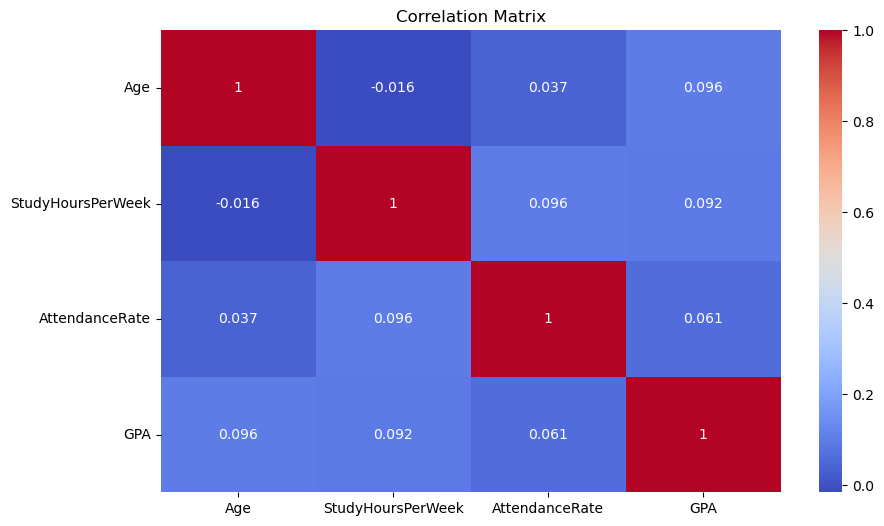

In [115]:
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

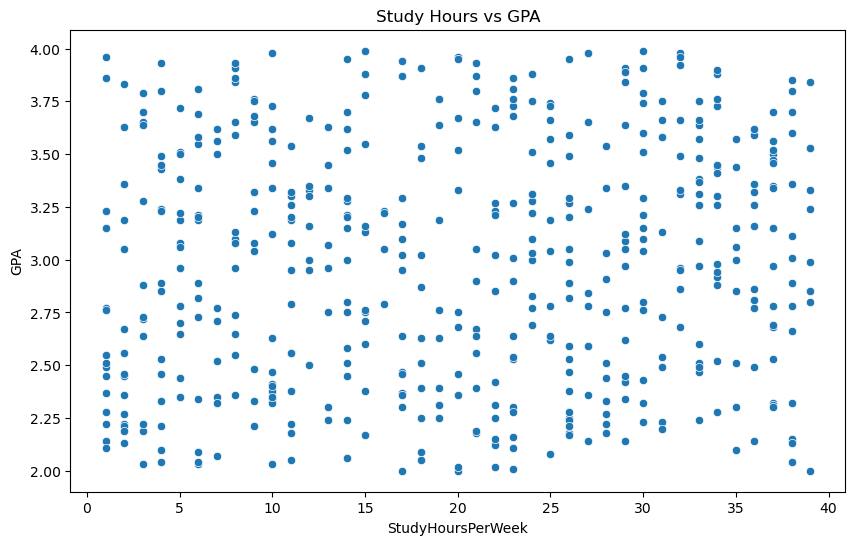

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='StudyHoursPerWeek', y='GPA', data=df)
plt.title('Study Hours vs GPA')
plt.show()

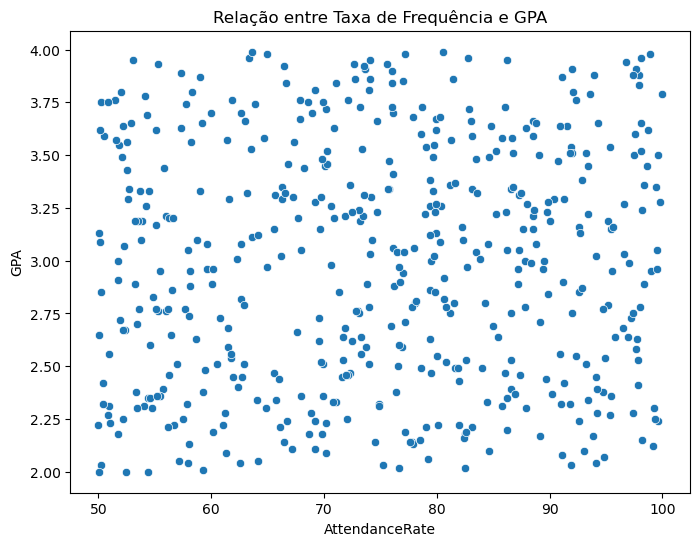

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AttendanceRate', y='GPA', data=df)
plt.title("Relação entre Taxa de Frequência e GPA")
plt.show()

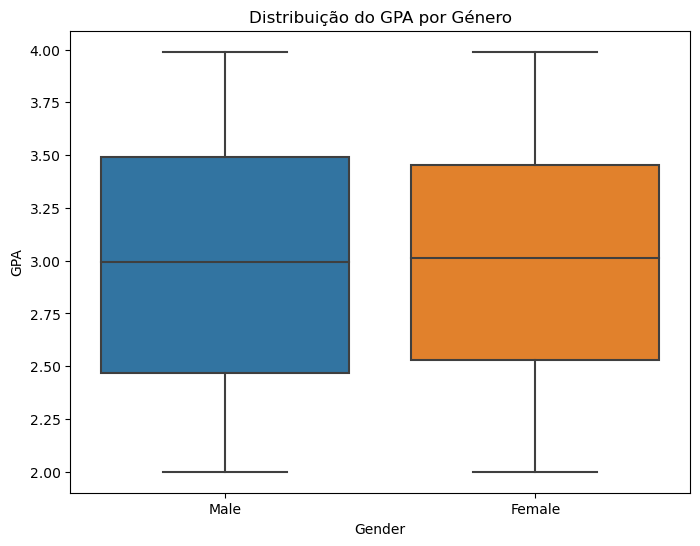

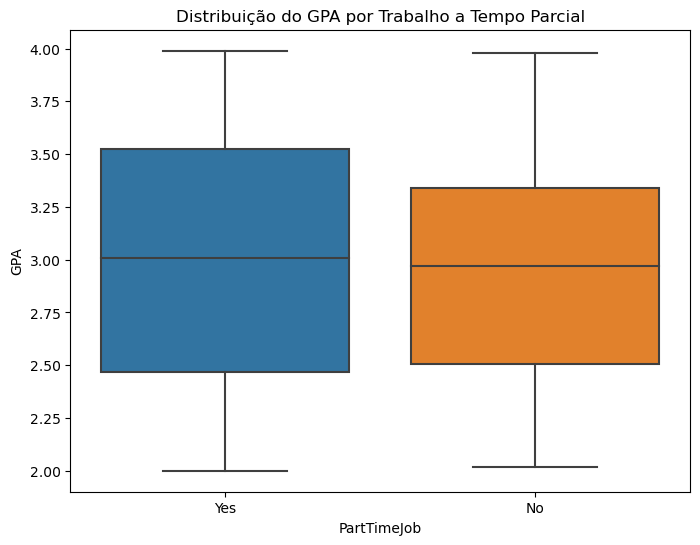

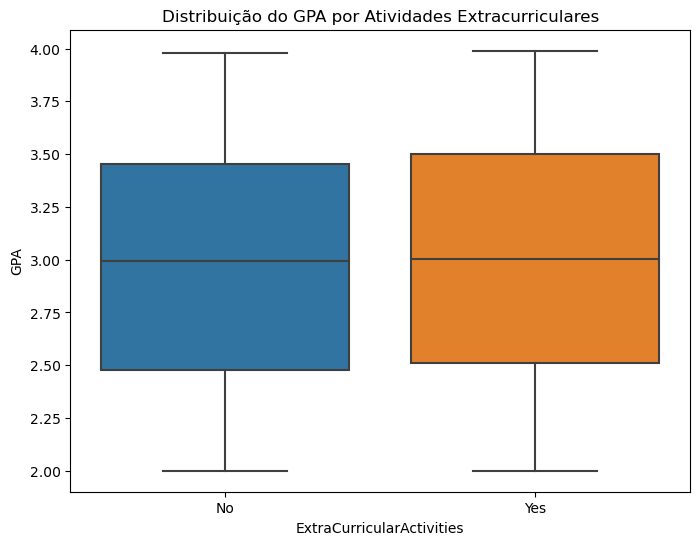

In [118]:
# BOXPLOTS para variaveis categoricas

# Boxplot para GPA por Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title("Distribuição do GPA por Género")
plt.show()

# Boxplot para GPA por PartTimeJob
plt.figure(figsize=(8, 6))
sns.boxplot(x='PartTimeJob', y='GPA', data=df)
plt.title("Distribuição do GPA por Trabalho a Tempo Parcial")
plt.show()

# Boxplot para GPA por ExtraCurricularActivities
plt.figure(figsize=(8, 6))
sns.boxplot(x='ExtraCurricularActivities', y='GPA', data=df)
plt.title("Distribuição do GPA por Atividades Extracurriculares")
plt.show()

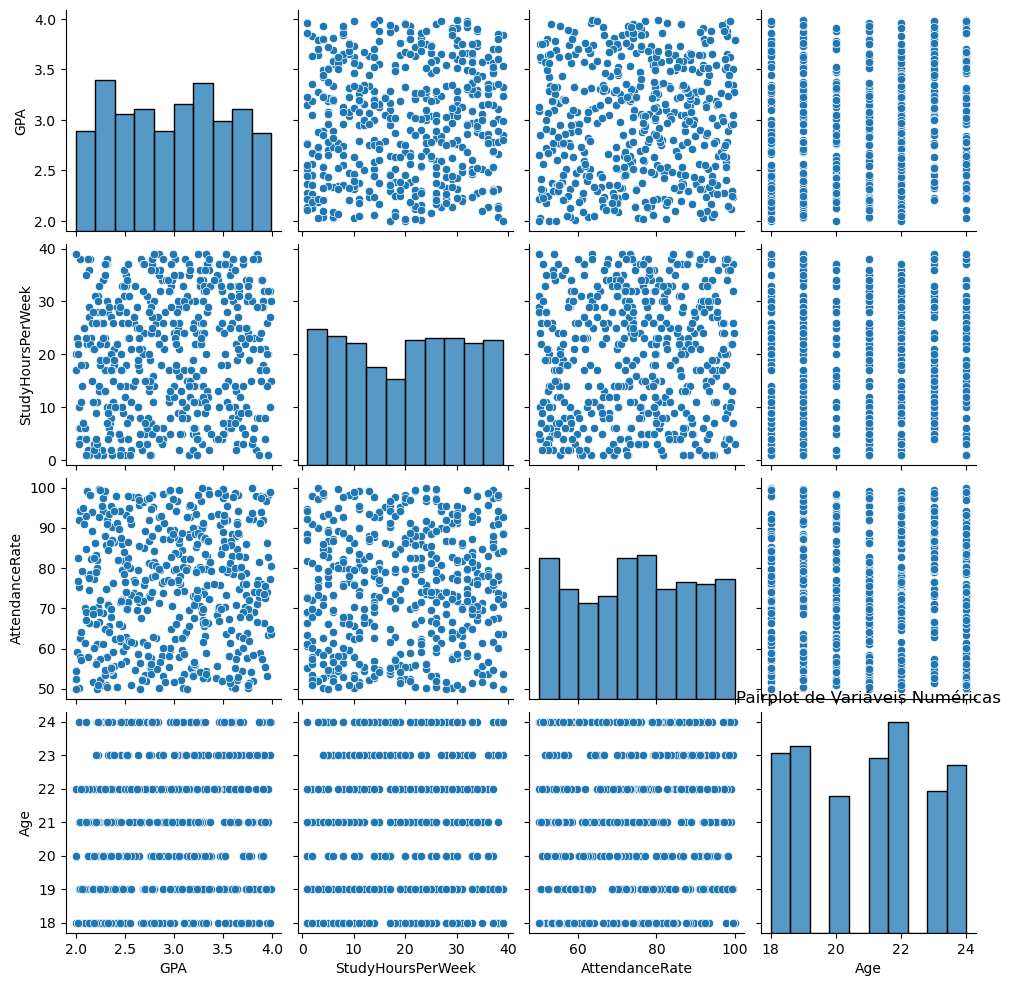

In [119]:
sns.pairplot(df[['GPA', 'StudyHoursPerWeek', 'AttendanceRate', 'Age']])
plt.title("Pairplot de Variáveis Numéricas")
plt.show()

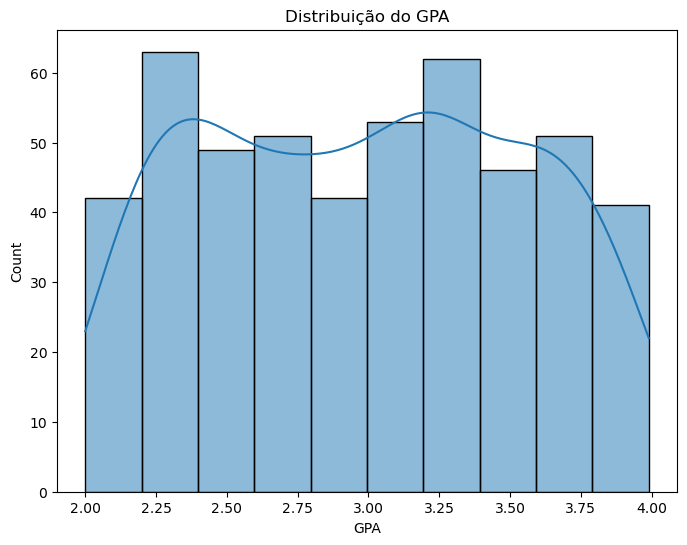

In [120]:
# Histograma do GPA
plt.figure(figsize=(8, 6))
sns.histplot(df['GPA'], kde=True)
plt.title("Distribuição do GPA")
plt.show()

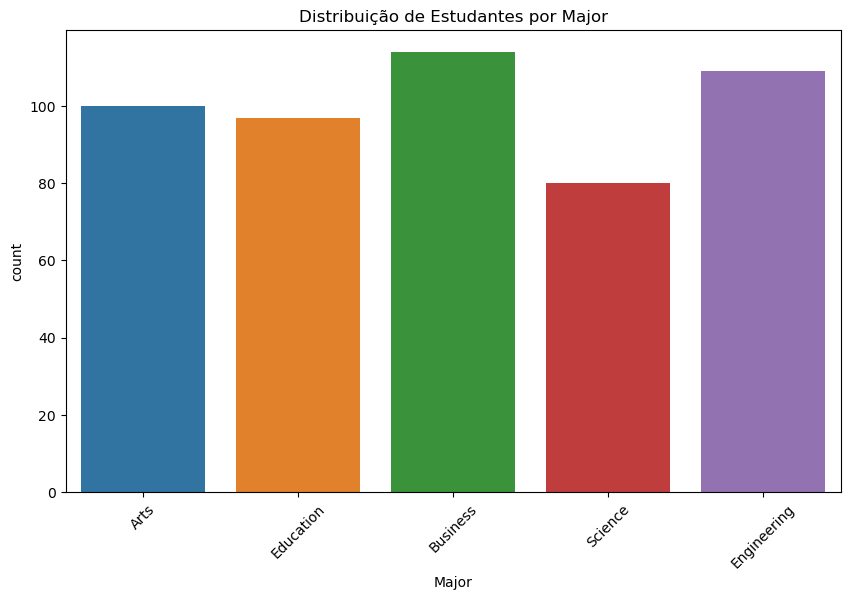

In [121]:
# Gráfico de barras para a distribuição de Major
plt.figure(figsize=(10, 6))
sns.countplot(x='Major', data=df)
plt.title("Distribuição de Estudantes por Major")
plt.xticks(rotation=45)
plt.show()

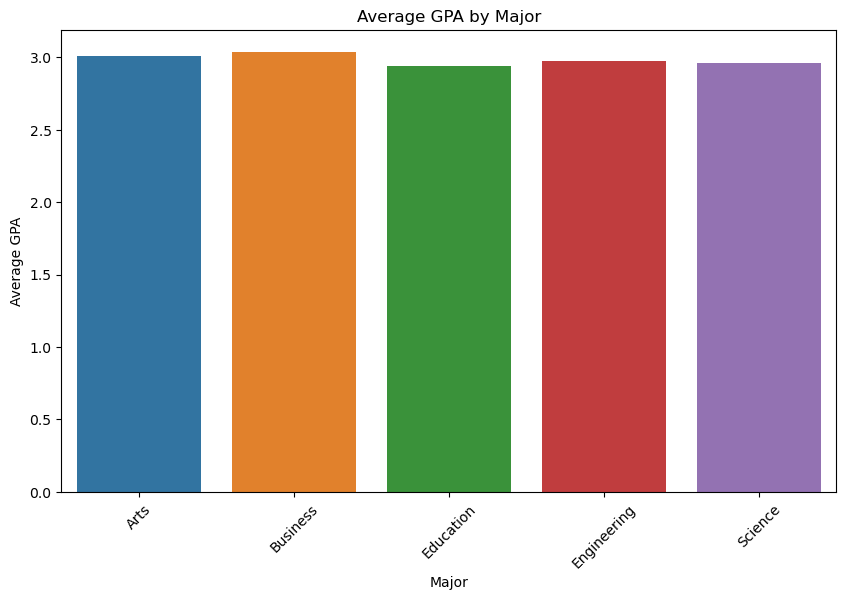

,Major,GPA
0,Arts,3.007100
1,Business,3.035965
2,Education,2.938866
3,Engineering,2.972844
4,Science,2.958250


In [122]:
plt.figure(figsize=(10, 6))
gpa_by_major = df.groupby('Major')['GPA'].mean().reset_index()

sns.barplot(x='Major', y='GPA', data=gpa_by_major)

plt.title('Average GPA by Major')
plt.xlabel('Major')
plt.ylabel('Average GPA')
plt.xticks(rotation=45)
plt.show()

gpa_by_major

# Label Enconding

In [123]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,24,37,90.75,3.47,0,1,0
1,0,22,37,74.90,2.32,2,0,0
2,1,22,10,53.36,2.38,1,0,0
3,1,24,10,70.26,3.46,4,1,0
4,1,18,19,74.87,2.31,2,1,0


# Train-Test Split

In [124]:
X = df.drop(['GPA'], axis=1)
y = df['GPA']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [127]:
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
rmse = mse ** 0.5
print(f'RMSE: {rmse:.2f}')

MSE: 0.35
RMSE: 0.59


In [130]:
# Mostrar os coeficientes do modelo
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

                           Coeficiente
Gender                        0.000439
Age                           0.020833
StudyHoursPerWeek             0.004547
AttendanceRate                0.001471
Major                        -0.023401
PartTimeJob                   0.016860
ExtraCurricularActivities     0.022992


In [131]:
from sklearn.ensemble import RandomForestRegressor

# Criar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(scaled_X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(scaled_X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print(f"RMSE do modelo Random Forest: {rmse_rf}")

RMSE do modelo Random Forest: 0.6208678094409472
